In [11]:
print("Top 5 nations, in comparison with global rates, with the most internal displacement correlated with natural disaster")

Top 5 nations, in comparison with global rates, with the most internal displacement correlated with natural disaster


In [14]:
%pip install wbdata 
import pandas as pd
import wbdata
import numpy as np
from matplotlib import animation as ani


Note: you may need to restart the kernel to use updated packages.


In [15]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [16]:
SOURCE=2
wbdata.get_indicator(source=SOURCE)

id                         name
-------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO             Agricultural machinery, tractors
AG.CON.FERT.PT.ZS          Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS             Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2             Agricultural land (sq. km)
AG.LND.AGRI.ZS             Agricultural land (% of land area)
AG.LND.ARBL.HA             Arable land (hectares)
AG.LND.ARBL.HA.PC          Arable land (hectares per person)
AG.LND.ARBL.ZS             Arable land (% of land area)
AG.LND.CREL.HA             Land under cereal production (hectares)
AG.LND.CROP.ZS             Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2          Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS          Rural land area where elevation is below 5 me

In [17]:
disp_stat = wbdata.get_dataframe({'VC.IDP.NWDS':'Internally displaced persons, new displacement associated with disasters (number of cases)'})
#top_five = disp_stat.groupby("country").sort_values("Internally displaced persons, new displacement associated with disasters (number of cases)", ascending=False)
disp_stat.head(50)

Internally displaced persons, new displacement associated with disasters (number of cases)
country                     date                                                                                            
Africa Eastern and Southern 2022                                          4296440.0                                         
                            2021                                          2338890.0                                         
                            2020                                          3585560.0                                         
                            2019                                          2727102.0                                         
                            2018                                          1810544.0                                         
                            2017                                          2179294.0                                         
                            2016                                           873020.0                                         
                            2015                                           905597.0                                         
                            2014                                           579067.0                                         
                            2013                                          1065100.0                                         
                            2012                                           910420.0                                         
                            2011                                           495700.0                                         
                            2010                                           463750.0                                         
                            2009                                                NaN                                         
                            2008                                           517600.0                                         
                            2007                                                NaN                                         
                            2006                                                NaN                                         
                            2005                                                NaN                                         
                            2004                                                NaN                                         
                            2003                                                NaN                                         
                            2002                                                NaN                                         
                            2001                                                NaN                                         
                            2000                                                NaN                                         
                            1999                                                NaN                                         
                            1998                                                NaN                                         
                            1997                                                NaN                                         
                            1996                                                NaN                                         
                            1995                                                NaN                                         
                            1994                                                NaN                                         
                            1993                                                NaN                                         
                            1992  

In [18]:
new_df = disp_stat.reset_index()
new_df

,country,date,"Internally displaced persons, new displacement associated with disasters (number of cases)"
0,Africa Eastern and Southern,2022,4296440.0
1,Africa Eastern and Southern,2021,2338890.0
2,Africa Eastern and Southern,2020,3585560.0
3,Africa Eastern and Southern,2019,2727102.0
4,Africa Eastern and Southern,2018,1810544.0
...,...,...,...
16753,Zimbabwe,1964,NaN
16754,Zimbabwe,1963,NaN
16755,Zimbabwe,1962,NaN
16756,Zimbabwe,1961,NaN


In [25]:
disp_stat_tbl= new_df.groupby("country").apply(sum).drop(["country","date"], axis=1).sort_values("Internally displaced persons, new displacement associated with disasters (number of cases)", ascending=False)
disp_stat_tbl.head(30)

,"Internally displaced persons, new displacement associated with disasters (number of cases)"
country,
World,375928016.0
Low & middle income,353416369.0
IDA & IBRD total,350508163.0
Middle income,326863046.0
IBRD only,250758876.0
Lower middle income,196602011.0
Early-demographic dividend,194082969.0
East Asia & Pacific,187423617.0
East Asia & Pacific (excluding high income),182160023.0


In [28]:
index_aggregated_top_five_rates=[0,15,17,19,29,33]
top_five_tbl=disp_stat_tbl.iloc[index_aggregated_top_five_rates]
top_five_tbl

,"Internally displaced persons, new displacement associated with disasters (number of cases)"
country,
World,375928016.0
China,96677000.0
Philippines,59574000.0
India,55923000.0
Pakistan,24753700.0
Bangladesh,17045000.0


In [54]:
def get_country_data(country_name): 
    """select specific country's internal displacement over time from data set"""
    
    df = new_df.loc[new_df['country'] == country_name].reset_index().drop(["index"], axis=1)
    df = df.drop(columns = ['country'])
    df = df.rename(columns = {'Internally displaced persons, new displacement associated with disasters (number of cases)': 
                              country_name})
    return df

#top_five_visual.iplot(title="Internal Displacement Over Time",xTitle='Year',yTitle='Internal Displacement')

In [55]:
world=get_country_data('World')
china=get_country_data('China')
philippines=get_country_data('Philippines')
india=get_country_data('India')
pakistan=get_country_data('Pakistan')
bangladesh=get_country_data('Bangladesh')
bangladesh 

,date,Bangladesh
0,2022,1524000.0
1,2021,99000.0
2,2020,4443000.0
3,2019,4084000.0
4,2018,78000.0
...,...,...
58,1964,NaN
59,1963,NaN
60,1962,NaN
61,1961,NaN


[Text(0.5, 0, 'years'), Text(0, 0.5, 'millions displaced')]

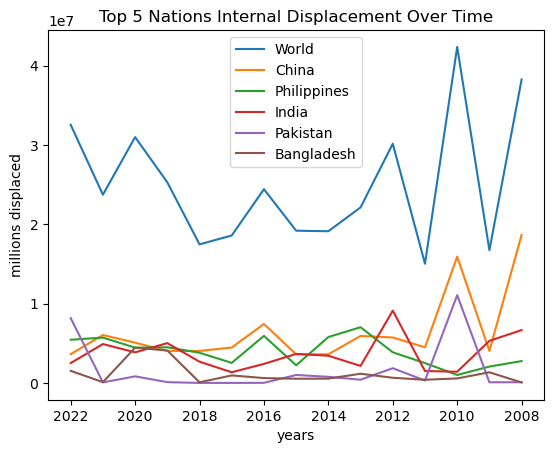

In [89]:
combined_df=world.merge(china, on ='date').merge(philippines, on='date').merge(india, on='date').merge(pakistan, on='date').merge(bangladesh, on='date') 
plot_countries=combined_df.plot(x='date', y=['World', 'China', 'Philippines', 'India', 'Pakistan', 'Bangladesh'], title= 'Top 5 Nations Internal Displacement Over Time')
#plotted_countries=plot_countries.plot(xtitle='date', ytitle= 'millions displaced', title='Top 5 Nations Internal Displacement Over Time')
#plt.show()
plot_countries.set(xlabel="years", ylabel="millions displaced")